ただの音叉

In [1]:
import math
import numpy as np
import pyaudio 
import struct

def play(stream2,data):  #再生用関数、ストリームと波形データを引数に

    chunk = 1024
    sp = 0  # 再生位置ポインタ
    buffer = data[sp:sp+chunk]
    while buffer:
        stream2.write(buffer)
        sp = sp + chunk
        buffer = data[sp:sp+chunk]

def createData(freqList = [440]): #オシレーター 

    data = []
    amp = 1.0 / len(freqList)    #使用時は波形データにampを乗算する

    for n in np.arange(0.05 * 44100):  # nはサンプル数
        s = 0.0                        #波形データをゼロクリア
        for f in freqList:
            s += amp * np.sin(2 * np.pi * f * n / 44100)
        # 振幅が大きい時はクリッピング
        if s > 1.0:  s = 1.0
        if s < -1.0: s = -1.0
        data.append(s) #末尾に追加        
    data = [int(x * 32767.0) for x in data] #値を32767～-32767間にする
    data = struct.pack("h" * len(data), *data)# バイナリに変換

    return data


# ストリームを開く
p = pyaudio.PyAudio() 
stream2 = p.open(format=pyaudio.paInt16,channels=1, rate=44100, output=1)

for i in range(5): # 20で1秒
    data = createData()
    play(stream2,data)

stream2.close()
p.terminate()

オシロスコープ。closeしてもキューが残ってる？ようでだんだん重くなるのに注意。ボイスチェンジャーの雛形でもある。qtのウィンドウを閉じてプログラムを終了する。

In [2]:
#プロット関係のライブラリ
import pyqtgraph as pg
from pyqtgraph.Qt import QtCore, QtGui
import numpy as np
import sys

#音声関係のライブラリ
import pyaudio
import struct

def convert(data): #オシレーター 
    
    data *= 2 # 音量
    data = np.where(data > 1.0, 1.0, data)
    data = np.where(data < -1.0, -1.0, data)
    data = [int(x * 32767.0) for x in data] #値を32767～-32767間にする
    
    # バイナリに変換
    data = struct.pack("h" * len(data), *data)

    return data

class PlotWindow():
    i = 0
    def __init__(self):
        #プロット初期設定
        self.win=pg.GraphicsWindow()
        self.win.setWindowTitle(u"リアルタイムプロット")
        
        # この3行は可視化用。実際はいらない
        self.plt=self.win.addPlot() #プロットのビジュアル関係
        self.plt.setYRange(-1,1)    #y軸の上限、下限の設定
        self.curve=self.plt.plot()  #プロットデータを入れる場所
        
        #マイクインプット設定
        self.CHUNK=20480             #1度に読み取る音声のデータ幅
        self.RATE=44100             #サンプリング周波数
        self.audio=pyaudio.PyAudio()
        self.stream=self.audio.open(format=pyaudio.paInt16,
                                    channels=1,
                                    rate=self.RATE,
                                    input=True,
                                    frames_per_buffer=self.CHUNK)

        #アップデート時間設定
        self.timer=QtCore.QTimer()
        self.timer.timeout.connect(self.update)
        self.timer.start(50)    #10msごとにupdateを呼び出し

        #音声データの格納場所(プロットデータ)
        self.data=np.zeros(self.CHUNK)

    def update(self):
        self.i += 1
        self.data=self.AudioInput()
        data = convert(self.data)
        play(stream2,data)
        # この1行は可視化用。実際はいらない
        self.curve.setData(self.data[:2048])   #プロットデータを格納

    def AudioInput(self):
        ret=self.stream.read(self.CHUNK)    #音声の読み取り(バイナリ)
        ret=np.frombuffer(ret, dtype="int16")/32768.0
        return ret

p = pyaudio.PyAudio() 
stream2 = p.open(format=pyaudio.paInt16,channels=1, rate=44100, output=1)

plotwin=PlotWindow()
if (sys.flags.interactive!=1) or not hasattr(QtCore, 'PYQT_VERSION'):
    QtGui.QApplication.instance().exec_()
stream2.close()
p.terminate()
print("done")

done


```
$ arecord -f S16_LE -r 48000 temp.wav
$ aplay temp.wav
```

(60000,) 48000


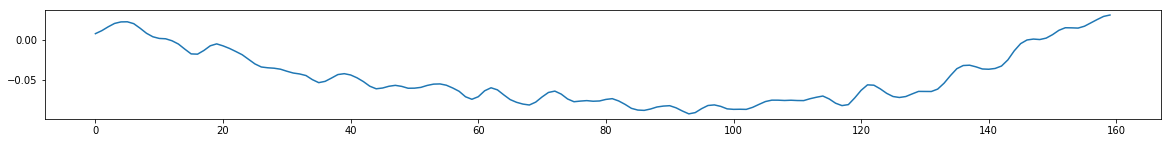

(30000,) 48000


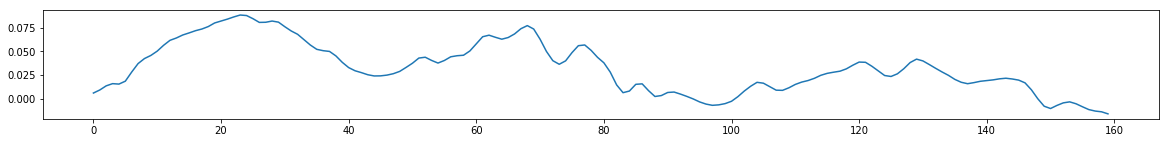

(36000,) 48000


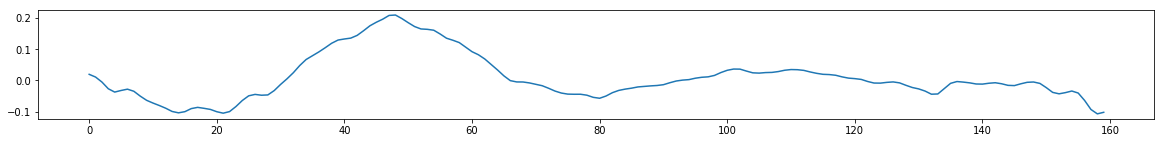

(48000,) 48000


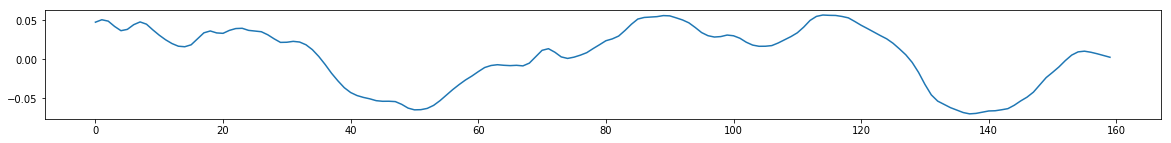

In [4]:
import matplotlib.pyplot as plt
import soundfile as sf

l = 160
wavfile = "./data/a.wav"
data1, rate = sf.read(wavfile) # rate == 48000 # samplerate:1秒あたりのフレーム数
print(data1.shape, rate)
data1 = data1[:l]
plt.figure(figsize=(20,2));plt.plot(data1);plt.show()

wavfile = "./data/b.wav"
data2, rate = sf.read(wavfile) # rate == 48000 # samplerate:1秒あたりのフレーム数
print(data2.shape, rate)
data2 = data2[:l]
plt.figure(figsize=(20,2));plt.plot(data2);plt.show()

wavfile = "./data/c.wav"
data3, rate = sf.read(wavfile) # rate == 48000 # samplerate:1秒あたりのフレーム数
print(data3.shape, rate)
data3 = data3[:l]
plt.figure(figsize=(20,2));plt.plot(data3);plt.show()

wavfile = "./data/d.wav"
data4, rate = sf.read(wavfile) # rate == 48000 # samplerate:1秒あたりのフレーム数
print(data4.shape, rate)
data4 = data4[:l]
plt.figure(figsize=(20,2));plt.plot(data4);plt.show()

(60000,) 48000


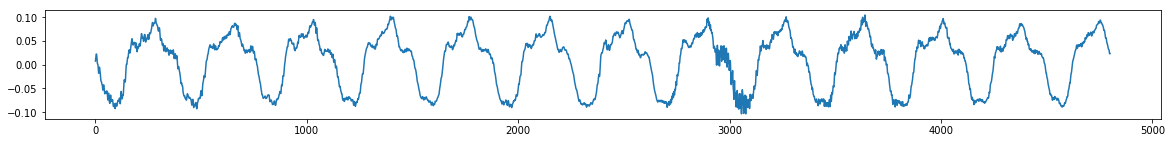

(30000,) 48000


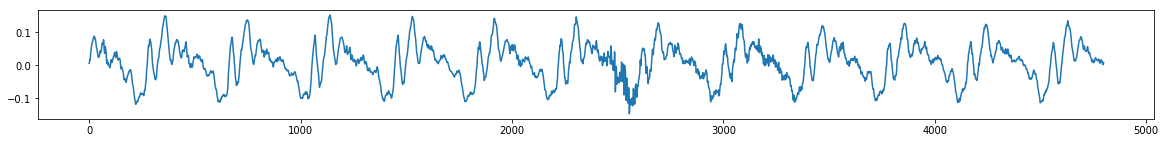

(36000,) 48000


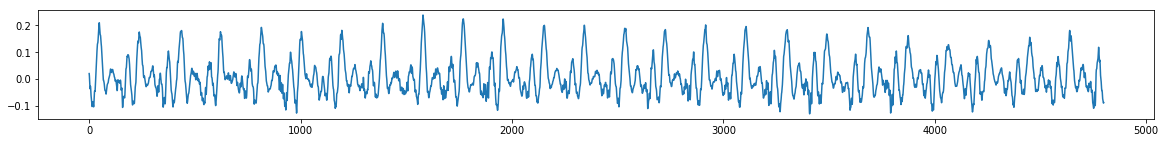

(48000,) 48000


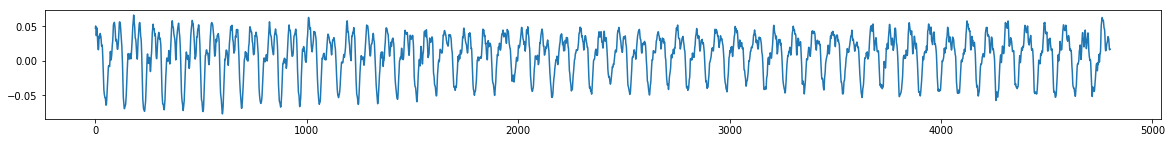

In [5]:
import matplotlib.pyplot as plt
import soundfile as sf

wavfile = "./data/a.wav"
data1, rate = sf.read(wavfile)
print(data1.shape, rate)
data1 = data1[:4800]
plt.figure(figsize=(20,2));plt.plot(data1);plt.show()

wavfile = "./data/b.wav"
data2, rate = sf.read(wavfile)
print(data2.shape, rate)
data2 = data2[:4800]
plt.figure(figsize=(20,2));plt.plot(data2);plt.show()

wavfile = "./data/c.wav"
data3, rate = sf.read(wavfile)
print(data3.shape, rate)
data3 = data3[:4800]
plt.figure(figsize=(20,2));plt.plot(data3);plt.show()

wavfile = "./data/d.wav"
data4, rate = sf.read(wavfile)
print(data4.shape, rate)
data4 = data4[:4800]
plt.figure(figsize=(20,2));plt.plot(data4);plt.show()

In [6]:
def show(f):

    F = np.fft.fft(f)

    F[int(len(F)/2)+1:] = 0+0.j

    X = np.c_[np.real(F)[:int(len(F)/2)+1],np.imag(F)[:int(len(F)/2)+1]]#.copy()
    
    # print("# ----------------")
    # print("# 何らかの変換")
    # print("# ----------------")

    X[int(len(X)/2):] = 0
    
    F = np.zeros(len(f), dtype=np.complex)
    F[:len(X)] = np.array([complex(r, i) for [r, i] in X])

    F[-int(len(F)/2):] = np.conj(F[1:int(len(F)/2)+1][::-1])

    g = np.fft.ifft(F)
    g = np.real(g)
    
    plt.figure(figsize=(20,2))
    plt.plot(X[:2000])
    plt.show()
    
    return g

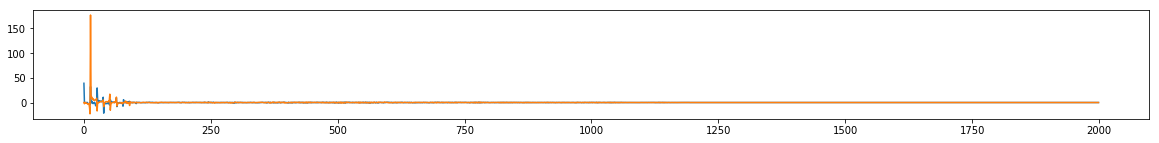

array([0.01199143, 0.01009536, 0.01453208, ..., 0.02481939, 0.02351216,
       0.01848476])

In [7]:
show(data1)

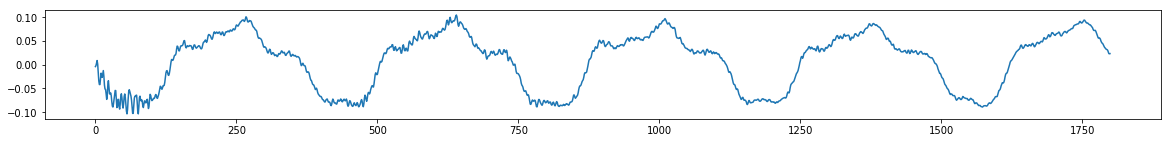

In [10]:
size = 2400
plt.figure(figsize=(20,2))
plt.plot(data1[3000:3000+size])
plt.show()

(1024,)


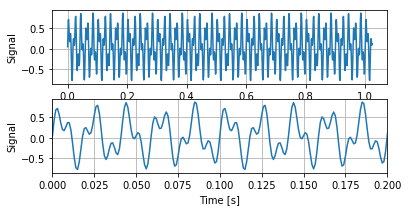

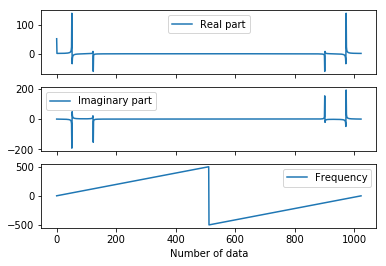

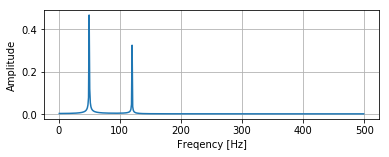

In [117]:
import numpy as np
import matplotlib.pyplot as plt

N = 1024            # サンプル数
dt = 0.001          # サンプリング周期 [s]
f1, f2 = 50, 120    # 周波数 [Hz]

t = np.arange(0, N*dt, dt) # 時間 [s]
x = (1.5*np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t))/3+0.05# 信号

print(x.shape)

sf.write('2.wav', np.hstack([x,x,x,x,x]), rate)

fig, ax = plt.subplots(2, figsize=(6,3))
ax[0].plot(t, x)
ax[0].set_xlabel("Time [s]"); ax[0].set_ylabel("Signal"); ax[0].grid()
ax[1].plot(t, x); ax[1].set_xlim(0, 0.2)
ax[1].set_xlabel("Time [s]"); ax[1].set_ylabel("Signal"); ax[1].grid()
plt.show()

F = np.fft.fft(x) # 変換結果
freq = np.fft.fftfreq(N, d=dt) # 周波数

fig, ax = plt.subplots(nrows=3, sharex=True, figsize=(6,4))
ax[0].plot(F.real, label="Real part"); ax[0].legend()
ax[1].plot(F.imag, label="Imaginary part"); ax[1].legend()
ax[2].plot(freq, label="Frequency"); ax[2].legend()
ax[2].set_xlabel("Number of data"); plt.show()

Amp = np.abs(F/(N/2)) # 振幅

fig, ax = plt.subplots(figsize=(6,2))
ax.plot(freq[1:int(N/2)], Amp[1:int(N/2)])
ax.set_xlabel("Freqency [Hz]"); ax.set_ylabel("Amplitude"); ax.grid(); plt.show()
# sf.write('2.wav', np.hstack([x,x,x,x,x]), rate)

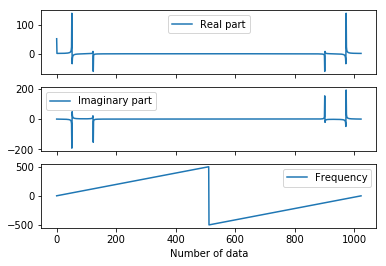

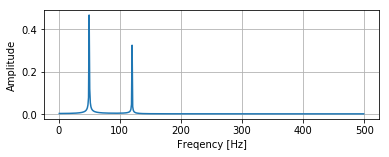

In [118]:
fig, ax = plt.subplots(nrows=3, sharex=True, figsize=(6,4))
ax[0].plot(F.real, label="Real part"); ax[0].legend()
ax[1].plot(F.imag, label="Imaginary part"); ax[1].legend()
ax[2].plot(freq, label="Frequency"); ax[2].legend()
ax[2].set_xlabel("Number of data"); plt.show()

Amp = np.abs(F/(N/2)) # 振幅

fig, ax = plt.subplots(figsize=(6,2))
ax.plot(freq[1:int(N/2)], Amp[1:int(N/2)])
ax.set_xlabel("Freqency [Hz]"); ax.set_ylabel("Amplitude"); ax.grid(); plt.show()
# sf.write('2.wav', np.hstack([x,x,x,x,x]), rate)

In [124]:
F.real[51], F.imag[52]

(141.0475933966125, 48.96192357061311)

(1024,)


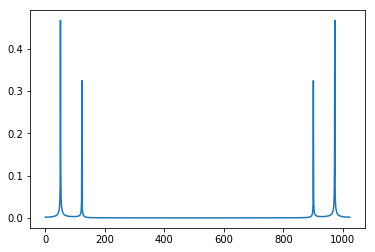

In [107]:
print(Amp.shape)
plt.plot(Amp)

(1024,)
(1024,)


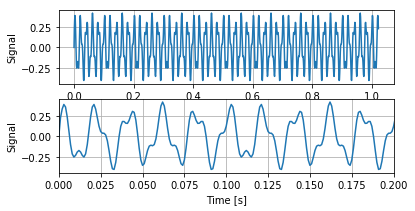

In [71]:
G = np.fft.ifft(F)
print(G.shape)

G = G.real
print(G.shape)
sf.write('real-0.wav', np.hstack([G,G,G,G,G]), rate)

fig, ax = plt.subplots(2, figsize=(6,3))
ax[0].plot(t, G)
ax[0].set_xlabel("Time [s]"); ax[0].set_ylabel("Signal"); ax[0].grid()
ax[1].plot(t, G); ax[1].set_xlim(0, 0.2)
ax[1].set_xlabel("Time [s]"); ax[1].set_ylabel("Signal"); ax[1].grid()
plt.show()

In [140]:
a = np.arange(10)
a[9:0:-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1])

(1024,)


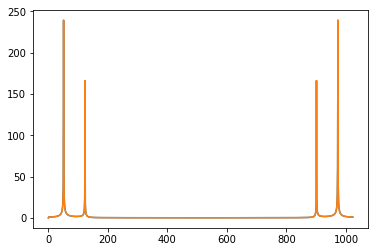

(1024,)


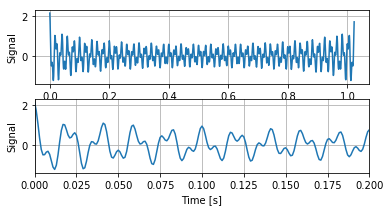

In [147]:
H = np.zeros((N,), dtype=np.complex)
H[:int(N/2)] = Amp[:int(N/2)]*(N/2)
H[int(N/2):] = Amp[int(N/2):0:-1]*(N/2)
H.real[0]= 0
H.imag = H.real
plt.plot(H.real)
plt.plot(H.imag)
print(H.shape)
plt.show()


G = np.fft.ifft(H)
print(G.shape)

G = G.real

sf.write('amp-amp.wav', np.hstack([G,G,G,G,G]), rate)

fig, ax = plt.subplots(2, figsize=(6,3))
ax[0].plot(t, G)
ax[0].set_xlabel("Time [s]"); ax[0].set_ylabel("Signal"); ax[0].grid()
ax[1].plot(t, G); ax[1].set_xlim(0, 0.2)
ax[1].set_xlabel("Time [s]"); ax[1].set_ylabel("Signal"); ax[1].grid()
plt.show()

# 130

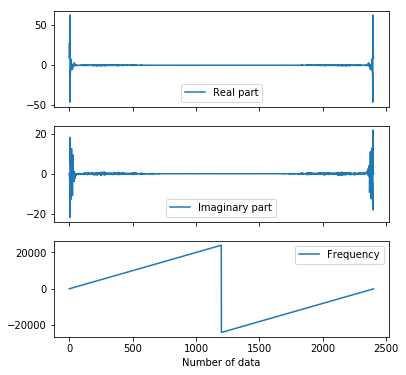

freq.shape: (2400,)
Amp.shape: (2400,)


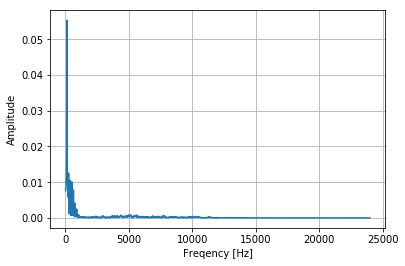

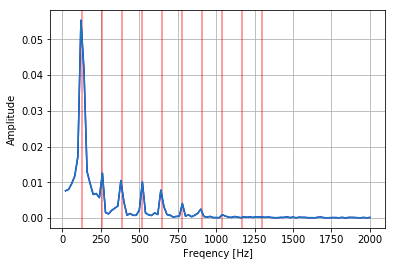

[ 5  6  4  7 12  3 18 25  8  2]
[120. 140. 100. 160. 260.  80. 380. 520. 180.  60.]
[ 60  80 100 120 140 160 180 260 380 520]
[0.0553209  0.04136075 0.01713061 0.01300303 0.01256029 0.01176045
 0.0104897  0.01009324 0.00965311 0.0096196 ]


In [19]:
N = 2400
dt = 1/48000
x = data1[N:N+N]
# x = data2[4500:4500+N]
# x = data3[2500:2500+N]

# sf.write('1.wav', np.hstack([x,x,x,x,x]), rate)

F = np.fft.fft(x) # 変換結果
freq = np.fft.fftfreq(N, d=dt) # 周波数



fig, ax = plt.subplots(nrows=3, sharex=True, figsize=(6,6))
ax[0].plot(F.real, label="Real part")
ax[0].legend()
ax[1].plot(F.imag, label="Imaginary part")
ax[1].legend()
ax[2].plot(freq, label="Frequency")
ax[2].legend()
ax[2].set_xlabel("Number of data")
plt.show()

Amp = np.abs(F/(N/2)) # 振幅
print("freq.shape:", freq.shape)
print("Amp.shape:", Amp.shape)
fig, ax = plt.subplots()
ax.plot(freq[1:int(N/2)], Amp[1:int(N/2)])
# ax.plot(freq[1:int(N/2)][:100], Amp[1:int(N/2)][:100])
ax.set_xlabel("Freqency [Hz]")
ax.set_ylabel("Amplitude")
ax.grid()
plt.show()

fig, ax = plt.subplots()
# ax.plot(freq[1:int(N/2)], Amp[1:int(N/2)])
a = np.arange(1,11)*130

for _a in a:
    plt.axvline(_a, color="r", alpha=0.5)

ax.plot(freq[1:int(N/2)][:100], Amp[1:int(N/2)][:100], color="b")


ax.plot(freq[1:int(N/2)][:100], Amp[1:int(N/2)][:100])


ax.set_xlabel("Freqency [Hz]")
ax.set_ylabel("Amplitude")
ax.grid()
plt.show()

A = np.argsort(Amp[1:int(N/2)])[::-1]
print(A[:10])
print(freq[1:int(N/2)][A[:10]])
print(np.array(sorted(freq[1:int(N/2)][A[:10]])).astype(np.int))
print(Amp[1:int(N/2)][A[:10]])

# 125

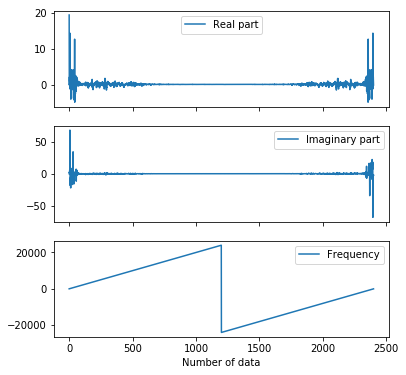

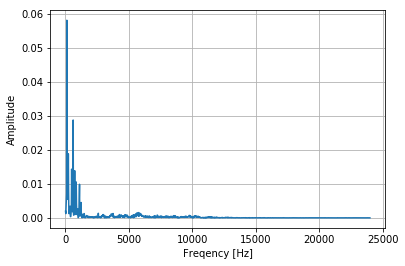

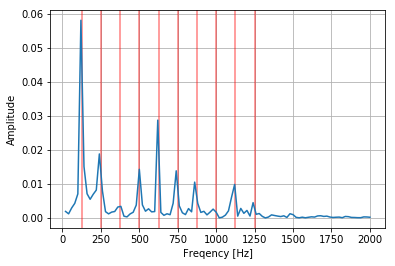

[ 5 30 11  6 24 36 42 55 10 12]
[ 120.  620.  240.  140.  500.  740.  860. 1120.  220.  260.]
[ 120  140  220  240  260  500  620  740  860 1120]
[ 120  140  220  240  260  500  620  740  860 1120]
[0.05813756 0.02879215 0.01885476 0.01512469 0.0143427  0.01389421
 0.01057359 0.0098935  0.00823533 0.00798192]


In [13]:
N = 2400
dt = 1/48000
# x = data1[3000:3000+N]
x = data2[N:N+N]
# x = data3[2500:2500+N]
# sf.write('2.wav', np.hstack([x,x,x,x,x]), rate)

F = np.fft.fft(x) # 変換結果
freq = np.fft.fftfreq(N, d=dt) # 周波数

fig, ax = plt.subplots(nrows=3, sharex=True, figsize=(6,6))
ax[0].plot(F.real, label="Real part")
ax[0].legend()
ax[1].plot(F.imag, label="Imaginary part")
ax[1].legend()
ax[2].plot(freq, label="Frequency")
ax[2].legend()
ax[2].set_xlabel("Number of data")
plt.show()

Amp = np.abs(F/(N/2)) # 振幅


fig, ax = plt.subplots()
ax.plot(freq[1:int(N/2)], Amp[1:int(N/2)])
# ax.plot(freq[1:int(N/2)][:100], Amp[1:int(N/2)][:100])
ax.set_xlabel("Freqency [Hz]")
ax.set_ylabel("Amplitude")
ax.grid()
plt.show()

fig, ax = plt.subplots()
# ax.plot(freq[1:int(N/2)], Amp[1:int(N/2)])


a = np.arange(1,11)*125

for _a in a:
    plt.axvline(_a, color="r", alpha=0.5)
ax.plot(freq[1:int(N/2)][:100], Amp[1:int(N/2)][:100])


ax.set_xlabel("Freqency [Hz]")
ax.set_ylabel("Amplitude")
ax.grid()
plt.show()


A = np.argsort(Amp[1:int(N/2)])[::-1]
print(A[:10])
print(freq[1:int(N/2)][A[:10]])
print(np.array(sorted(freq[1:int(N/2)][A[:10]])).astype(np.int))
print(np.array(sorted(freq[1:int(N/2)][A[:10]])).astype(np.int))
print(Amp[1:int(N/2)][A[:10]])

# 130, 125, 520

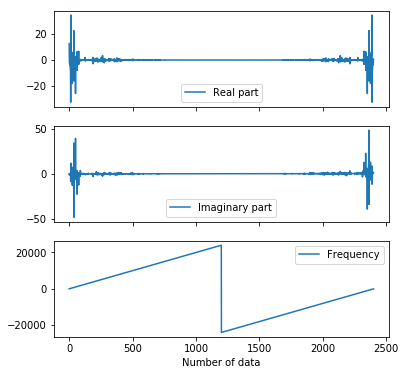

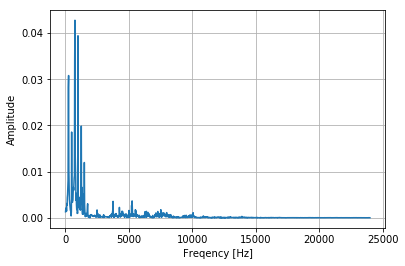

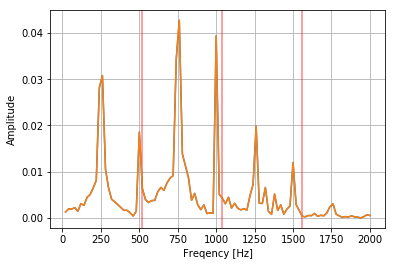

[37 49 36 12 11 62 24 38 74 39]
[ 760. 1000.  740.  260.  240. 1260.  500.  780. 1500.  800.]
[ 240  260  500  740  760  780  800 1000 1260 1500]
[0.04274062 0.03938063 0.03428662 0.0307853  0.02821069 0.01985966
 0.01856667 0.01387149 0.0119829  0.01127766]


In [14]:
N = 2400
dt = 1/48000
# x = data1[3000:3000+N]
# x = data2[4500:4500+N]
x = data3[N:N+N]


# sf.write('3.wav', np.hstack([x,x,x,x,x]), rate)

F = np.fft.fft(x) # 変換結果
freq = np.fft.fftfreq(N, d=dt) # 周波数

fig, ax = plt.subplots(nrows=3, sharex=True, figsize=(6,6))
ax[0].plot(F.real, label="Real part")
ax[0].legend()
ax[1].plot(F.imag, label="Imaginary part")
ax[1].legend()
ax[2].plot(freq, label="Frequency")
ax[2].legend()
ax[2].set_xlabel("Number of data")
plt.show()

Amp = np.abs(F/(N/2)) # 振幅

fig, ax = plt.subplots()
ax.plot(freq[1:int(N/2)], Amp[1:int(N/2)])
ax.set_xlabel("Freqency [Hz]")
ax.set_ylabel("Amplitude")
ax.grid()
plt.show()

fig, ax = plt.subplots()
# ax.plot(freq[1:int(N/2)], Amp[1:int(N/2)])
ax.plot(freq[1:int(N/2)][:100], Amp[1:int(N/2)][:100])

a = np.arange(1,4)*520

for _a in a:
    plt.axvline(_a, color="r", alpha=0.5)
ax.plot(freq[1:int(N/2)][:100], Amp[1:int(N/2)][:100])

ax.set_xlabel("Freqency [Hz]")
ax.set_ylabel("Amplitude")
ax.grid()
plt.show()


A = np.argsort(Amp[1:int(N/2)])[::-1]
print(A[:10])
print(freq[1:int(N/2)][A[:10]])
print(np.array(sorted(freq[1:int(N/2)][A[:10]])).astype(np.int))
print(Amp[1:int(N/2)][A[:10]])

# 130, 125, 520, 250

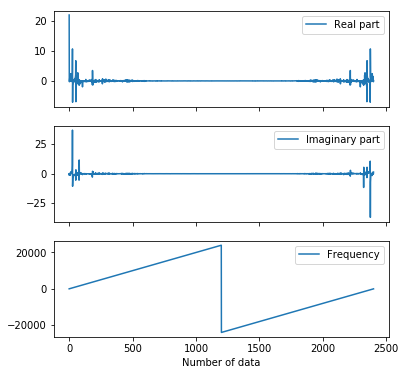

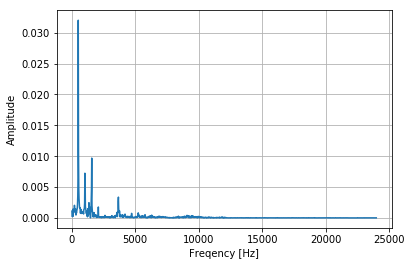

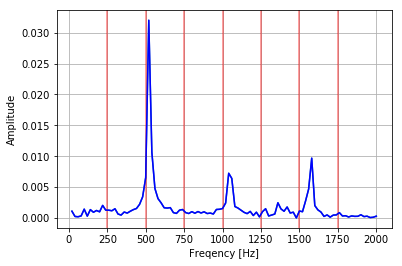

[ 25  26  78  51  24  52  27  77  23 183]
[ 520.  540. 1580. 1040.  500. 1060.  560. 1560.  480. 3680.]
[ 480  500  520  540  560 1040 1060 1560 1580 3680]
[0.03201251 0.01064672 0.00968741 0.00724036 0.0065462  0.00640313
 0.00477893 0.0046871  0.00341707 0.0033665 ]


In [15]:
N = 2400
dt = 1/48000
# x = data1[3000:3000+N]
# x = data2[4500:4500+N]
x = data4[N:N+N]


# sf.write('4.wav', np.hstack([x,x,x,x,x]), rate)

F = np.fft.fft(x) # 変換結果
freq = np.fft.fftfreq(N, d=dt) # 周波数

fig, ax = plt.subplots(nrows=3, sharex=True, figsize=(6,6))
ax[0].plot(F.real, label="Real part")
ax[0].legend()
ax[1].plot(F.imag, label="Imaginary part")
ax[1].legend()
ax[2].plot(freq, label="Frequency")
ax[2].legend()
ax[2].set_xlabel("Number of data")
plt.show()

Amp = np.abs(F/(N/2)) # 振幅

fig, ax = plt.subplots()
ax.plot(freq[1:int(N/2)], Amp[1:int(N/2)])
ax.set_xlabel("Freqency [Hz]")
ax.set_ylabel("Amplitude")
ax.grid()
plt.show()

fig, ax = plt.subplots()
# ax.plot(freq[1:int(N/2)], Amp[1:int(N/2)])
ax.plot(freq[1:int(N/2)][:100], Amp[1:int(N/2)][:100])

a = np.arange(1,8)*250

for _a in a:
    plt.axvline(_a, color="r", alpha=0.5)
ax.plot(freq[1:int(N/2)][:100], Amp[1:int(N/2)][:100], color="b")

ax.set_xlabel("Freqency [Hz]")
ax.set_ylabel("Amplitude")
ax.grid()
plt.show()


A = np.argsort(Amp[1:int(N/2)])[::-1]
print(A[:10])
print(freq[1:int(N/2)][A[:10]])
print(np.array(sorted(freq[1:int(N/2)][A[:10]])).astype(np.int))
print(Amp[1:int(N/2)][A[:10]])

In [16]:
2400*155

372000

In [17]:
a = np.arange(1,6)*10
print(a)
aa = np.argsort(a[1:])[::-1]
print(aa)
print(a[1:][aa])

[10 20 30 40 50]
[3 2 1 0]
[50 40 30 20]


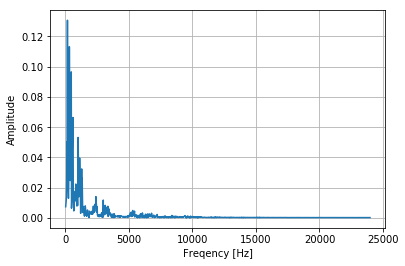

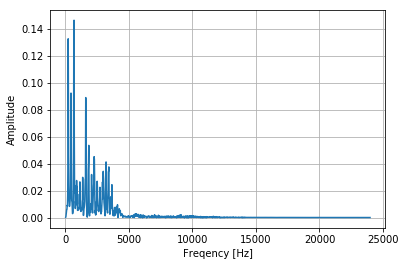

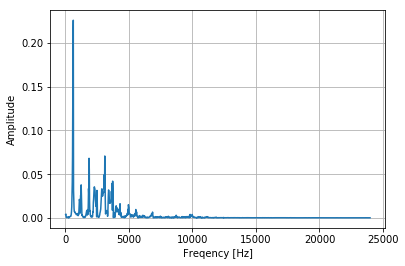

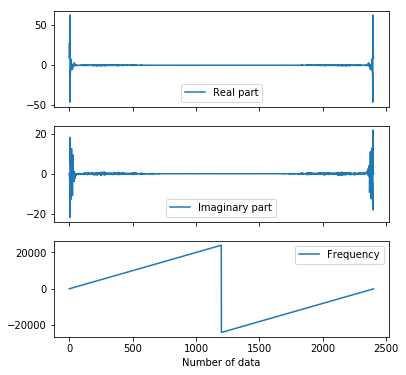

freq.shape: (2400,)
Amp.shape: (2400,)


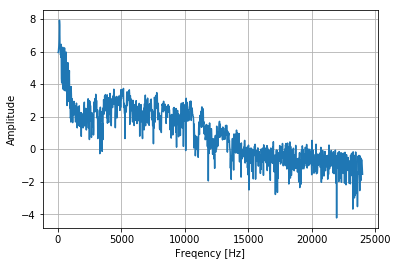

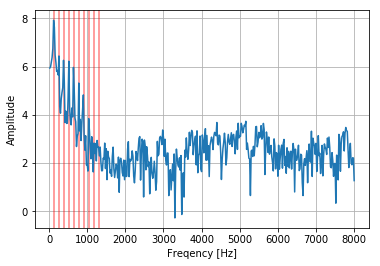

[ 5  6  4  7 12  3 18 25  8  2]
[120. 140. 100. 160. 260.  80. 380. 520. 180.  60.]
[ 60  80 100 120 140 160 180 260 380 520]
[0.0553209  0.04136075 0.01713061 0.01300303 0.01256029 0.01176045
 0.0104897  0.01009324 0.00965311 0.0096196 ]


In [99]:
N = 2400
dt = 1/48000
x = data1[N:N+N]
# x = data2[4500:4500+N]
# x = data3[2500:2500+N]

# sf.write('1.wav', np.hstack([x,x,x,x,x]), rate)

F = np.fft.fft(x) # 変換結果
freq = np.fft.fftfreq(N, d=dt) # 周波数



fig, ax = plt.subplots(nrows=3, sharex=True, figsize=(6,6))
ax[0].plot(F.real, label="Real part")
ax[0].legend()
ax[1].plot(F.imag, label="Imaginary part")
ax[1].legend()
ax[2].plot(freq, label="Frequency")
ax[2].legend()
ax[2].set_xlabel("Number of data")
plt.show()

Amp = np.abs(F/(N/2)) # 振幅
print("freq.shape:", freq.shape)
print("Amp.shape:", Amp.shape)
fig, ax = plt.subplots()
ax.plot(freq[1:int(N/2)], np.log(Amp[1:int(N/2)]/(2.0*1e-5)))
# ax.plot(freq[1:int(N/2)][:100], Amp[1:int(N/2)][:100])
ax.set_xlabel("Freqency [Hz]")
ax.set_ylabel("Amplitude")
ax.grid()
plt.show()

fig, ax = plt.subplots()
# ax.plot(freq[1:int(N/2)], Amp[1:int(N/2)])
a = np.arange(1,11)*130

for _a in a:
    plt.axvline(_a, color="r", alpha=0.5)

# ax.plot(freq[1:int(N/2)][:100], Amp[1:int(N/2)][:100], color="b")


ax.plot(freq[1:int(N/2)][:400], np.log(Amp[1:int(N/2)][:400]/(2.0*1e-5)))


ax.set_xlabel("Freqency [Hz]")
ax.set_ylabel("Amplitude")
ax.grid()
plt.show()

A = np.argsort(Amp[1:int(N/2)])[::-1]
print(A[:10])
print(freq[1:int(N/2)][A[:10]])
print(np.array(sorted(freq[1:int(N/2)][A[:10]])).astype(np.int))
print(Amp[1:int(N/2)][A[:10]])